<a href="https://colab.research.google.com/github/Abhiroop17/Animal-Image-classification/blob/main/Animal_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Animal Image Classification**
This project is an image classification model that distinguishes between images of cats, dogs, and foxes using Convolutional Neural Networks (CNNs). The model is trained on labeled datasets, where images are organized by category (cats, dogs, and snakes) in separate directories. The pipeline includes unzipping and splitting the dataset into training and testing sets, building and training a CNN to recognize the distinguishing features of each class, and evaluating the model's performance on unseen images.

After training, the model is capable of predicting the class of a new image with a confidence score, providing insights into the classification’s reliability. This project demonstrates the application of CNNs in animal image classification, with potential extensions to other image categorization tasks.








# **Import Required Libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **Unzip the dataset and split it into training and test directories**

In [3]:
import zipfile
import os
import shutil
from sklearn.model_selection import train_test_split
from glob import glob

# Define paths
zip_file_path = '/content/animals.zip'
extracted_folder = 'dataset'
train_dir = 'dataset/train'
test_dir = 'dataset/test'

# Step 1: Unzip the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

# Step 2: Create train and test directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [4]:
# List categories, assuming the zip file unzips to folders like 'cat', 'dog', 'snakes'
categories = ['cats', 'dogs', 'snakes']
for category in categories:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

    # Get list of all images in each category
    category_path = os.path.join(extracted_folder, category)
    images = glob(f"{category_path}/*.jpg")  # Adjust the extension if necessary

    # Step 3: Split images into train and test sets (80-20 split)
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

    # Copy images to train and test directories
    for img in train_images:
        shutil.copy(img, os.path.join(train_dir, category))
    for img in test_images:
        shutil.copy(img, os.path.join(test_dir, category))

print("Dataset unzipped and split into train and test directories.")

Dataset unzipped and split into train and test directories.


# **Set up Data Generators**

In [5]:
# Paths to the training and validation directories
train_dir = 'dataset/train'
val_dir = 'dataset/test'

# Image Data Generators for augmenting and loading images
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

# Flowing training images in batches
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Flowing validation images in batches
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    # Added shuffle=False to ensure all validation data is used
    shuffle=False
)

Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


# **Define the CNN Model**

In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes: cat, dog, snake
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Compile the Model**

In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# **Train the Model**

In [8]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 166ms/step - accuracy: 0.3978 - loss: 1.0785 - val_accuracy: 0.4462 - val_loss: 1.0400
Epoch 2/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9583 - val_loss: 0.2088
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 141ms/step - accuracy: 0.5880 - loss: 0.8717 - val_accuracy: 0.4201 - val_loss: 1.1658
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9583 - val_loss: 0.1145
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 154ms/step - accuracy: 0.5915 - loss: 0.8448 - val_accuracy: 0.4618 - val_loss: 1.1974
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9583 - val_loss: 0.0926
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 154ms/step - accuracy: 0.5949 - loss: 0.8040 - val_accuracy: 0.5694 - val_loss: 0.8862
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9583 - val_loss: 0.1666
Epoch 9/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 153ms/step - accuracy: 0.6130 - loss: 0

# **Evaluate the Model**

In [9]:
loss, accuracy = model.evaluate(val_generator)
print(f'Validation Loss: {loss:.4f}')
print(f'Validation Accuracy: {accuracy:.4f}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.4489 - loss: 1.2409
Validation Loss: 0.9287
Validation Accuracy: 0.6217


# **Save the Model**

In [10]:
model.save('cat_dog_fox_classifier.h5')

# **Plotting training & validation accuracy values**

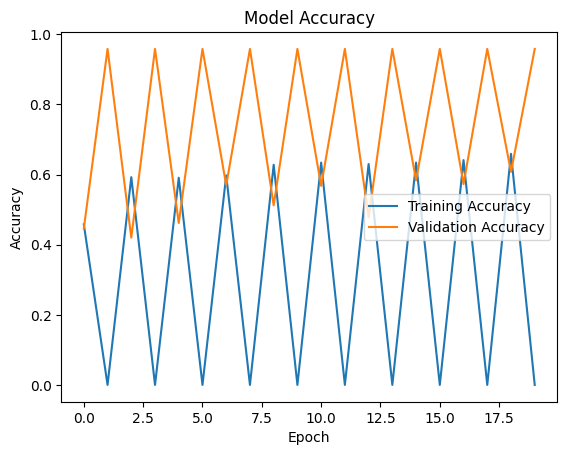

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


# **Plotting training & validation loss values**

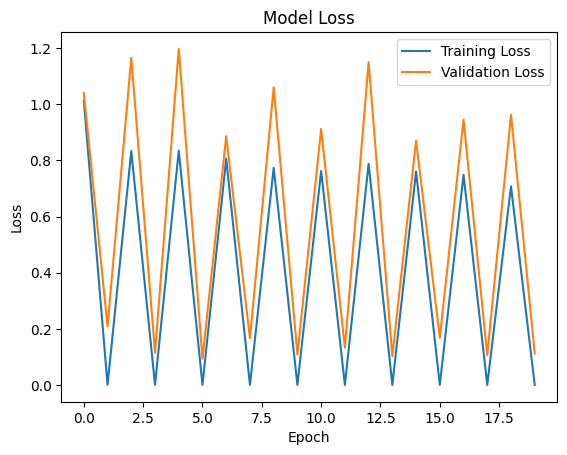

In [13]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# **Load the Trained Model**

In [14]:
model = tf.keras.models.load_model('cat_dog_fox_classifier.h5')

In [22]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# **Preprocess the Image**

In [23]:
def preprocess_image(img_path):
    # Load and preprocess the image using functions from keras.preprocessing.image
    img = image.load_img(img_path, target_size=(128, 128))  # Resize the image
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for batch format
    img_array /= 255.0  # Scale pixel values to [0, 1] range
    return img_array

# **Make a Prediction**

In [28]:
def predict_image(img_path):
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]

    # Map predicted class to label
    class_labels = ['Cat', 'Dog', 'Snake']
    predicted_label = class_labels[predicted_class]
    confidence = np.max(predictions) * 100  # Confidence level for the predicted class

    return predicted_label, confidence

# **Test Prediction with an Example Image**

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 671ms/step
Predicted Label: Cat
Confidence: 53.51%


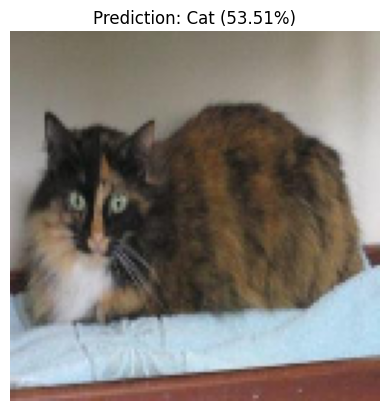

In [25]:
img_path = '/content/dataset/test/cats/0_0006.jpg'  # Provide the path to the image you want to predict
predicted_label, confidence = predict_image(img_path)

print(f"Predicted Label: {predicted_label}")
print(f"Confidence: {confidence:.2f}%")

# Display the image with prediction
img = image.load_img(img_path, target_size=(128, 128))
plt.imshow(img)
plt.title(f"Prediction: {predicted_label} ({confidence:.2f}%)")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Label: Dog
Confidence: 50.82%


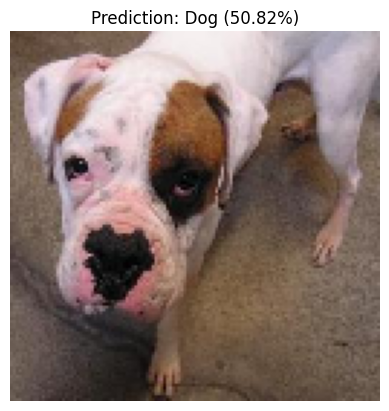

In [26]:
img_path = '/content/dataset/test/dogs/1_0055.jpg'  # Provide the path to the image you want to predict
predicted_label, confidence = predict_image(img_path)

print(f"Predicted Label: {predicted_label}")
print(f"Confidence: {confidence:.2f}%")

# Display the image with prediction
img = image.load_img(img_path, target_size=(128, 128))
plt.imshow(img)
plt.title(f"Prediction: {predicted_label} ({confidence:.2f}%)")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Label: Snake
Confidence: 99.82%


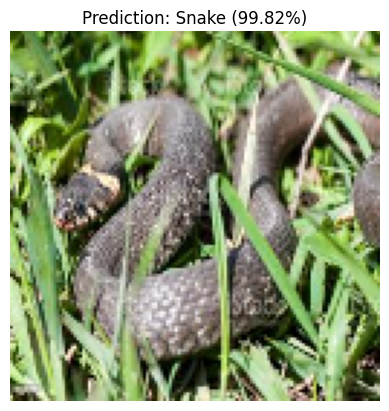

In [29]:
img_path = '/content/dataset/test/snakes/2_0087.jpg'  # Provide the path to the image you want to predict
predicted_label, confidence = predict_image(img_path)

print(f"Predicted Label: {predicted_label}")
print(f"Confidence: {confidence:.2f}%")

# Display the image with prediction
img = image.load_img(img_path, target_size=(128, 128))
plt.imshow(img)
plt.title(f"Prediction: {predicted_label} ({confidence:.2f}%)")
plt.axis('off')
plt.show()